## How to have Python Flask as Backend and Javascript in Frontend

- How to create dynamic Chartist.js charts based off data supplied by a server

- In this example, we use Flask as the server for the data

- Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time

- Data is from: https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

- Lets watch this video: https://www.youtube.com/watch?v=geKvJbQsOmM


       month  diet  gym  finance
0    2004-01   100   31       48
1    2004-02    75   26       49
2    2004-03    67   24       47
3    2004-04    70   22       48
4    2004-05    72   22       43
..       ...   ...  ...      ...
163  2017-08    46   52       43
164  2017-09    44   50       47
165  2017-10    44   47       45
166  2017-11    41   47       47
167  2017-12    39   45       56

[168 rows x 4 columns]
     month  diet  gym
0  2004-01   100   31
1  2004-02    75   26
2  2004-03    67   24
3  2004-04    70   22
4  2004-05    72   22
        month  diet  gym
0  2004-01-01   100   31
1  2004-02-01    75   26
2  2004-03-01    67   24
3  2004-04-01    70   22
4  2004-05-01    72   22
5  2004-06-01    64   24
6  2004-07-01    60   23
7  2004-08-01    59   28
8  2004-09-01    53   25
9  2004-10-01    52   24
10 2004-11-01    50   23
11 2004-12-01    42   24
12 2005-01-01    64   32
13 2005-02-01    54   28
14 2005-03-01    56   27
15 2005-04-01    56   25
16 2005-05-01    59   2

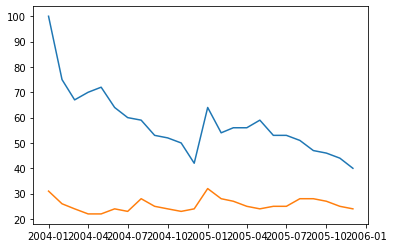

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
print(df)

# df_new = df[(df['month'].str.contains('2005'))][['month', 'diet']]

# df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ['2004', '2005'])))][['month', 'diet']]
df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ['2004', '2005'])))][['month', 'diet', 'gym']]

print(df_new.head())

df_new['month'] = pd.to_datetime(df_new['month'])
df_new = df_new.sort_values(by=['month'])
print(df_new)
plt.plot(df_new['month'], df_new['diet'])
plt.plot(df_new['month'], df_new['gym'])
plt.show()

In [ ]:
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd


# curl "http://0.0.0.0:3000/?n=2004&n=2005&m=diet&m=gym"
# https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

app = Flask(__name__)

df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']


@app.route('/', methods=['GET'])
def my_route():
    ls_year = request.args.getlist('n')
    ls_col = request.args.getlist('m')
    print(ls_year)

    df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ls_year)))][['month'] + ls_col]

    df_new['month'] = pd.to_datetime(df_new['month'])
    df_new = df_new.sort_values(by=['month'])

    return jsonify(df_new.to_json())


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=3000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:3000/ (Press CTRL+C to quit)
[2020-09-09 18:31:33,549] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/andre/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_fu

[]


127.0.0.1 - - [09/Sep/2020 18:31:35] "GET /favicon.ico HTTP/1.1" 404 -
